In [177]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# 2020 DataFrame

In [178]:
df_2020 = pd.read_csv('WHR20_DataForFigure2.1.csv')
df_2020 = df_2020.drop(columns=['Standard error of ladder score','upperwhisker','lowerwhisker',
                              'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                                'Ladder score in Dystopia', 'Dystopia + residual', 'Explained by: Social support'])
df_2020.head(10)

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,Western Europe,7.8087,1.285190,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.008072,0.670201,0.287985,0.434101
5,Netherlands,Western Europe,7.4489,1.338946,0.975675,0.613626,0.336318,0.368570
6,Sweden,Western Europe,7.3535,1.322235,0.986470,0.650298,0.272828,0.442066
7,New Zealand,North America and ANZ,7.2996,1.242318,1.008138,0.646790,0.325726,0.461268
8,Austria,Western Europe,7.2942,1.317286,1.000934,0.603369,0.255510,0.281256
9,Luxembourg,Western Europe,7.2375,1.536676,0.986443,0.610137,0.195954,0.367041


In [179]:
df_2020.rename(columns = {"Country name":"Country"}, inplace = True)
df_2020.rename(columns = {"Ladder score":"Happiness Score 2020"}, inplace = True)
df_2020.rename(columns = {"Explained by: Freedom to make life choices":"Freedom 2020"}, inplace = True)
df_2020.rename(columns = {"Explained by: Perceptions of corruption":"Trust (Government Corruption) 2020"}, inplace = True)
df_2020.rename(columns = {"Explained by: Log GDP per capita":"GDP per capital 2020"}, inplace = True)
df_2020.rename(columns = {"Overall rank":"Happiness Rank 2020"}, inplace = True)
df_2020.rename(columns = {"Explained by: Healthy life expectancy":"Health (Life Expectancy) 2020"}, inplace = True)
df_2020.rename(columns = {"Explained by: Generosity":"Generosity 2020"}, inplace = True)
df_2020.rename(columns = {"Regional indicator":"Region"}, inplace = True)

df_2020.head()

,Country,Region,Happiness Score 2020,GDP per capital 2020,Health (Life Expectancy) 2020,Freedom 2020,Generosity 2020,Trust (Government Corruption) 2020
0,Finland,Western Europe,7.8087,1.285190,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.008072,0.670201,0.287985,0.434101


# Mapping the Regions

In [180]:
map_data = gpd.read_file("Igismap/TM_WORLD_BORDERS-0.3.shp")
map_data.rename(columns = {"name":"Country"}, inplace = True)
map_data = map_data.drop(columns = ['fips','iso2', 'iso3', 'un','pop2005','area','region','lon','lat'])
map_data.head()

,Country,subregion,geometry
0,Azerbaijan,145,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
1,Albania,39,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,American Samoa,61,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
3,Algeria,15,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
4,Angola,17,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."


In [181]:
merged_map_data = pd.merge(map_data, df_2020, 
                       how = "left", on = "Country")
merged_map_data.fillna(0, inplace = True)

merged_map_data.head()

,Country,subregion,geometry,Region,Happiness Score 2020,GDP per capital 2020,Health (Life Expectancy) 2020,Freedom 2020,Generosity 2020,Trust (Government Corruption) 2020
0,Azerbaijan,145,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",Commonwealth of Independent States,5.1648,0.990273,0.731134,0.467735,0.040113,0.247307
1,Albania,39,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",Central and Eastern Europe,4.8827,0.906653,0.846330,0.461946,0.171028,0.025361
2,American Samoa,61,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546...",0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Algeria,15,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",Middle East and North Africa,5.0051,0.943856,0.745419,0.083944,0.118915,0.129191
4,Angola,17,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -...",0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000


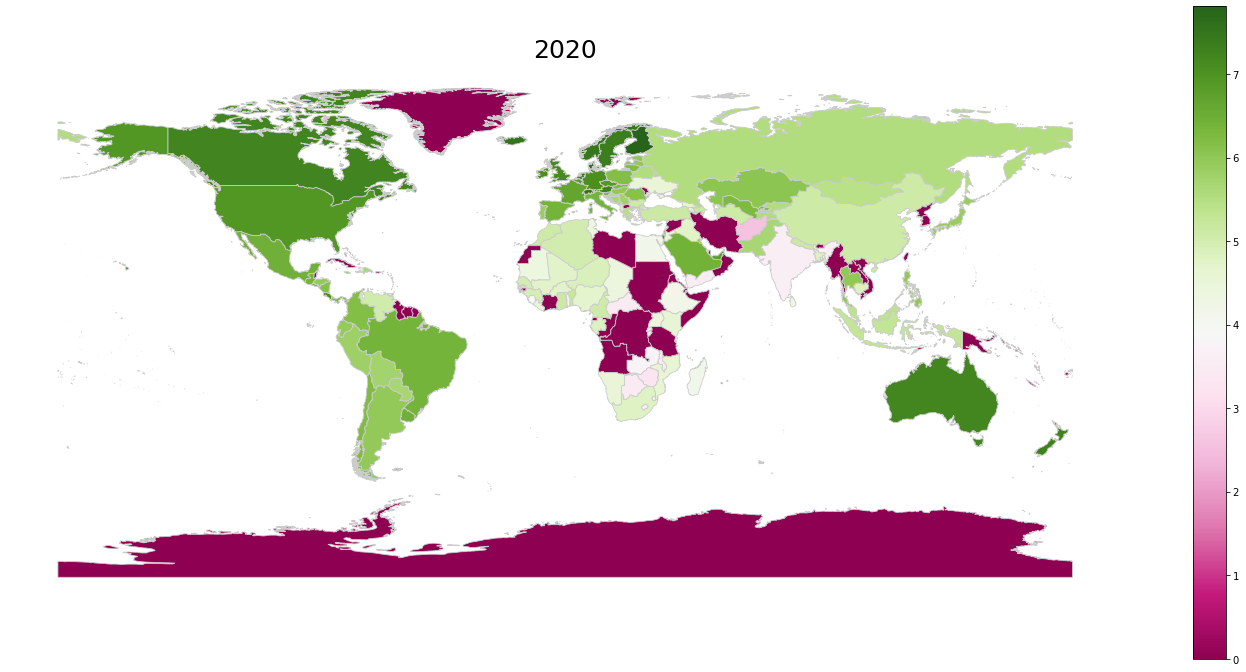

In [182]:
fig, ax = plt.subplots(1, figsize=(25, 12))
ax.axis("off")
ax.set_title("2020", 
             fontdict =  {"fontsize": "25", "fontweight" : "3"})
merged_map_data.plot(column = "Happiness Score 2020", cmap = 'PiYG',
                 linewidth=0.8, ax=ax, edgecolor="0.8", 
                 legend = True)
plt.show()

# Grouped by Region

In [183]:
df_2020_regions = df_2020.groupby(["Region"], as_index=False).mean()
df_2020_regions

,Region,Happiness Score 2020,GDP per capital 2020,Health (Life Expectancy) 2020,Freedom 2020,Generosity 2020,Trust (Government Corruption) 2020
0,Central and Eastern Europe,5.883818,1.079527,0.826199,0.447895,0.131079,0.054702
1,Commonwealth of Independent States,5.358342,0.841350,0.702987,0.464354,0.171706,0.122152
2,East Asia,5.714850,1.185275,0.932255,0.436815,0.164634,0.150638
3,Latin America and Caribbean,5.981786,0.871039,0.774657,0.520302,0.151457,0.086553
4,Middle East and North Africa,5.227159,0.998307,0.724121,0.375862,0.143173,0.112388
5,North America and ANZ,7.173525,1.307087,0.971216,0.611826,0.307593,0.325313
6,South Asia,4.475443,0.640591,0.620979,0.449734,0.222228,0.093571
7,Southeast Asia,5.383367,0.890821,0.702408,0.618563,0.306065,0.148924
8,Sub-Saharan Africa,4.383495,0.437448,0.356113,0.387285,0.200586,0.106646
9,Western Europe,6.899219,1.300418,0.995932,0.549439,0.224752,0.262678


In [184]:
fig = px.scatter(df_2020_regions, x="Happiness Score 2020", y="GDP per capital 2020", size="GDP per capital 2020", color="Region",
                 hover_name="Region", log_x=True, size_max=30, title ="Regions With Their Average Happiness Score and GDP per Capital")
fig.show()


# Finding Relationships

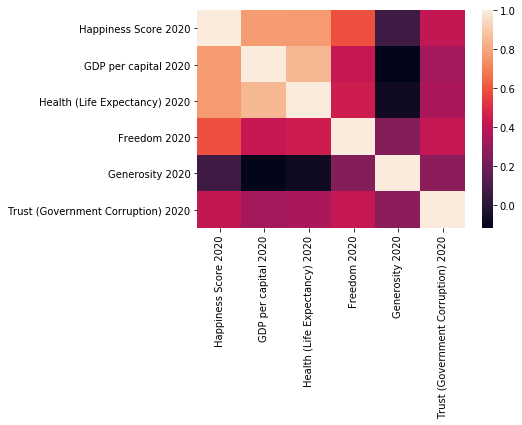

In [185]:
sns.heatmap(df_2020.corr())

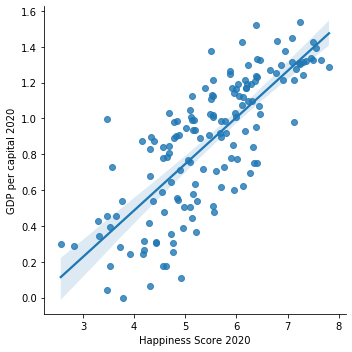

In [186]:
sns.lmplot(x='Happiness Score 2020', y='GDP per capital 2020',data=df_2020 )

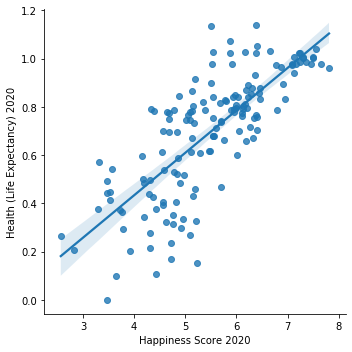

In [187]:
sns.lmplot(x='Happiness Score 2020', y='Health (Life Expectancy) 2020',data=df_2020 )

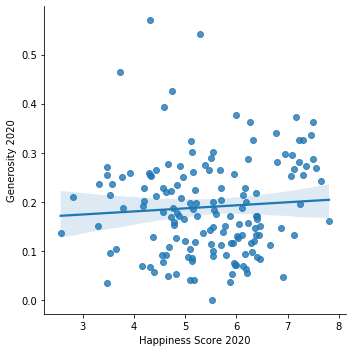

In [188]:
sns.lmplot(x='Happiness Score 2020', y='Generosity 2020',data=df_2020 )

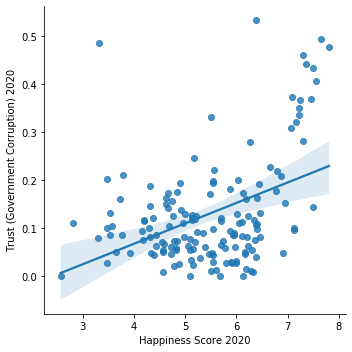

In [189]:
sns.lmplot(x='Happiness Score 2020', y='Trust (Government Corruption) 2020',data=df_2020 )

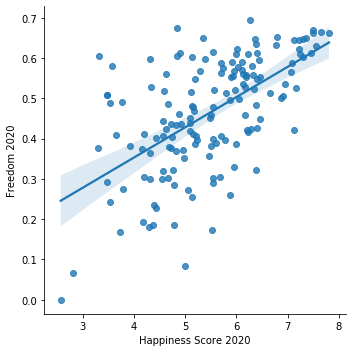

In [190]:
sns.lmplot(x='Happiness Score 2020', y='Freedom 2020',data=df_2020 )

# Comparisson with previous year records

In [191]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [192]:
df_2019.rename(columns = {"Country or region":"Country"}, inplace = True)
df_2019.rename(columns = {"Score":"Happiness Score 2019"}, inplace = True)
df_2019.rename(columns = {"Freedom to make life choices":"Freedom 2019"}, inplace = True)
df_2019.rename(columns = {"Perceptions of corruption":"Trust (Government Corruption) 2019"}, inplace = True)
df_2019.rename(columns = {"GDP per capita":"GDP per capital 2019"}, inplace = True)
df_2019.rename(columns = {"Overall rank":"Happiness Rank 2019"}, inplace = True)
df_2019.rename(columns = {"Healthy life expectancy":"Health (Life Expectancy) 2019"}, inplace = True)
df_2019.rename(columns = {"Generosity":"Generosity 2019"}, inplace = True)
df_2019 = df_2019.drop(columns=['Social support'])

df_2018.rename(columns = {"Country or region":"Country"}, inplace = True)
df_2018.rename(columns = {"Score":"Happiness Score 2018"}, inplace = True)
df_2018.rename(columns = {"Freedom to make life choices":"Freedom 2018"}, inplace = True)
df_2018.rename(columns = {"Perceptions of corruption":"Trust (Government Corruption) 2018"}, inplace = True)
df_2018.rename(columns = {"GDP per capita":"GDP per capital 2018"}, inplace = True)
df_2018.rename(columns = {"Overall rank":"Happiness Rank 2018"}, inplace = True)
df_2018.rename(columns = {"Healthy life expectancy":"Health (Life Expectancy) 2018"}, inplace = True)
df_2018.rename(columns = {"Generosity":"Generosity 2018"}, inplace = True)
df_2018.drop(columns=['Social support'])
df_2018 = df_2018.drop(columns=['Social support'])

df_2017.rename(columns = {"Happiness.Rank":"Happiness Rank 2017"}, inplace = True)
df_2017.rename(columns = {"Happiness.Score":"Happiness Score 2017"}, inplace = True)
df_2017.rename(columns = {"Economy..GDP.per.Capita.":"GDP per capital 2017"}, inplace = True)
df_2017.rename(columns = {"Health..Life.Expectancy.":"Health (Life Expectancy) 2017"}, inplace = True)
df_2017.rename(columns = {"Freedom":"Freedom 2017"}, inplace = True)
df_2017.rename(columns = {"Generosity":"Generosity 2017"}, inplace = True)
df_2017.rename(columns = {"Trust..Government.Corruption.":"Trust (Government Corruption) 2017"}, inplace = True)
df_2017 = df_2017.drop(columns=['Whisker.high','Whisker.low','Family','Dystopia.Residual'])

df_2016.rename(columns = {"Happiness Rank":"Happiness Rank 2016"}, inplace = True)
df_2016.rename(columns = {"Happiness Score":"Happiness Score 2016"}, inplace = True)
df_2016.rename(columns = {"Freedom":"Freedom 2016"}, inplace = True)
df_2016.rename(columns = {"Economy (GDP per Capita)":"GDP per capital 2016"}, inplace = True)
df_2016.rename(columns = {"Health (Life Expectancy)":"Health (Life Expectancy) 2016"}, inplace = True)
df_2016.rename(columns = {"Generosity":"Generosity 2016"}, inplace = True)
df_2016.rename(columns = {"Trust (Government Corruption)":"Trust (Government Corruption) 2016"}, inplace = True)

df_2015.rename(columns = {"Happiness Rank":"Happiness Rank 2015"}, inplace = True)
df_2015.rename(columns = {"Happiness Score":"Happiness Score 2015"}, inplace = True)
df_2015.rename(columns = {"Freedom":"Freedom 2015"}, inplace = True)
df_2015.rename(columns = {"Economy (GDP per Capita)":"GDP per capital 2015"}, inplace = True)
df_2015.rename(columns = {"Health (Life Expectancy)":"Health (Life Expectancy) 2015"}, inplace = True)
df_2015.rename(columns = {"Generosity":"Generosity 2015"}, inplace = True)
df_2015.rename(columns = {"Trust (Government Corruption)":"Trust (Government Corruption) 2015"}, inplace = True)
df_2015 = df_2015.drop(columns=['Standard Error', 'Family', 'Dystopia Residual','Region'])


In [193]:
df_2015_Score = df_2015.drop(columns=['Happiness Rank 2015', 'GDP per capital 2015', 
                                                    'Health (Life Expectancy) 2015', 'Freedom 2015', 
                                                    'Trust (Government Corruption) 2015', 'Generosity 2015'])

df_2016_Score = df_2016.drop(columns=['Happiness Rank 2016', 'GDP per capital 2016', 
                                                    'Health (Life Expectancy) 2016', 'Freedom 2016', 
                                                    'Trust (Government Corruption) 2016', 'Generosity 2016'])

df_2017_Score = df_2017.drop(columns=['Happiness Rank 2017', 'GDP per capital 2017', 
                                                    'Health (Life Expectancy) 2017', 'Freedom 2017', 
                                                    'Trust (Government Corruption) 2017', 'Generosity 2017'])

df_2018_Score = df_2018.drop(columns=['Happiness Rank 2018', 'GDP per capital 2018', 
                                                    'Health (Life Expectancy) 2018', 'Freedom 2018', 
                                                    'Trust (Government Corruption) 2018', 'Generosity 2018'])

df_2019_Score = df_2019.drop(columns=['Happiness Rank 2019', 'GDP per capital 2019', 
                                                    'Health (Life Expectancy) 2019', 'Freedom 2019', 
                                                    'Trust (Government Corruption) 2019','Generosity 2019'])

df_2020_Score = df_2020.drop(columns=['GDP per capital 2020', 'Region',
                                                    'Health (Life Expectancy) 2020', 'Freedom 2020', 
                                                    'Trust (Government Corruption) 2020', 'Generosity 2020'])


In [194]:
merged_Score = pd.merge(df_2015_Score, df_2016_Score,  
                       on = "Country",
                      how = "left")
merged_Score

,Country,Happiness Score 2015,Region,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Family,Dystopia Residual
0,Switzerland,7.587,Western Europe,7.509,7.428,7.590,1.14524,2.69463
1,Iceland,7.561,Western Europe,7.501,7.333,7.669,1.18326,2.83137
2,Denmark,7.527,Western Europe,7.526,7.460,7.592,1.16374,2.73939
3,Norway,7.522,Western Europe,7.498,7.421,7.575,1.12690,2.66465
4,Canada,7.427,North America,7.404,7.335,7.473,1.09610,2.70485
...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,Sub-Saharan Africa,3.515,3.444,3.586,0.61586,0.96819
154,Benin,3.340,Sub-Saharan Africa,3.484,3.404,3.564,0.10419,2.10812
155,Syria,3.006,Middle East and Northern Africa,3.069,2.936,3.202,0.14866,0.81789
156,Burundi,2.905,Sub-Saharan Africa,2.905,2.732,3.078,0.23442,2.10404


In [195]:
merged_Score = pd.merge(merged_Score, df_2017_Score,  
                       on = "Country",
                      how = "left")
merged_Score

,Country,Happiness Score 2015,Region,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Family,Dystopia Residual,Happiness Score 2017
0,Switzerland,7.587,Western Europe,7.509,7.428,7.590,1.14524,2.69463,7.494
1,Iceland,7.561,Western Europe,7.501,7.333,7.669,1.18326,2.83137,7.504
2,Denmark,7.527,Western Europe,7.526,7.460,7.592,1.16374,2.73939,7.522
3,Norway,7.522,Western Europe,7.498,7.421,7.575,1.12690,2.66465,7.537
4,Canada,7.427,North America,7.404,7.335,7.473,1.09610,2.70485,7.316
...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,Sub-Saharan Africa,3.515,3.444,3.586,0.61586,0.96819,3.471
154,Benin,3.340,Sub-Saharan Africa,3.484,3.404,3.564,0.10419,2.10812,3.657
155,Syria,3.006,Middle East and Northern Africa,3.069,2.936,3.202,0.14866,0.81789,3.462
156,Burundi,2.905,Sub-Saharan Africa,2.905,2.732,3.078,0.23442,2.10404,2.905


In [196]:
merged_Score = pd.merge(merged_Score, df_2018_Score,  
                       on = "Country",
                      how = "left")
merged_Score

,Country,Happiness Score 2015,Region,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Family,Dystopia Residual,Happiness Score 2017,Happiness Score 2018
0,Switzerland,7.587,Western Europe,7.509,7.428,7.590,1.14524,2.69463,7.494,7.487
1,Iceland,7.561,Western Europe,7.501,7.333,7.669,1.18326,2.83137,7.504,7.495
2,Denmark,7.527,Western Europe,7.526,7.460,7.592,1.16374,2.73939,7.522,7.555
3,Norway,7.522,Western Europe,7.498,7.421,7.575,1.12690,2.66465,7.537,7.594
4,Canada,7.427,North America,7.404,7.335,7.473,1.09610,2.70485,7.316,7.328
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,Sub-Saharan Africa,3.515,3.444,3.586,0.61586,0.96819,3.471,3.408
154,Benin,3.340,Sub-Saharan Africa,3.484,3.404,3.564,0.10419,2.10812,3.657,4.141
155,Syria,3.006,Middle East and Northern Africa,3.069,2.936,3.202,0.14866,0.81789,3.462,3.462
156,Burundi,2.905,Sub-Saharan Africa,2.905,2.732,3.078,0.23442,2.10404,2.905,2.905


In [197]:
merged_Score = pd.merge(merged_Score, df_2019_Score,  
                       on = "Country",
                      how = "left")
merged_Score

,Country,Happiness Score 2015,Region,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Family,Dystopia Residual,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Switzerland,7.587,Western Europe,7.509,7.428,7.590,1.14524,2.69463,7.494,7.487,7.480
1,Iceland,7.561,Western Europe,7.501,7.333,7.669,1.18326,2.83137,7.504,7.495,7.494
2,Denmark,7.527,Western Europe,7.526,7.460,7.592,1.16374,2.73939,7.522,7.555,7.600
3,Norway,7.522,Western Europe,7.498,7.421,7.575,1.12690,2.66465,7.537,7.594,7.554
4,Canada,7.427,North America,7.404,7.335,7.473,1.09610,2.70485,7.316,7.328,7.278
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,Sub-Saharan Africa,3.515,3.444,3.586,0.61586,0.96819,3.471,3.408,3.334
154,Benin,3.340,Sub-Saharan Africa,3.484,3.404,3.564,0.10419,2.10812,3.657,4.141,4.883
155,Syria,3.006,Middle East and Northern Africa,3.069,2.936,3.202,0.14866,0.81789,3.462,3.462,3.462
156,Burundi,2.905,Sub-Saharan Africa,2.905,2.732,3.078,0.23442,2.10404,2.905,2.905,3.775


In [198]:
merged_Score = pd.merge(merged_Score, df_2020_Score,  
                       on = "Country",
                      how = "left")
merged_Score

,Country,Happiness Score 2015,Region,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Family,Dystopia Residual,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Happiness Score 2020
0,Switzerland,7.587,Western Europe,7.509,7.428,7.590,1.14524,2.69463,7.494,7.487,7.480,7.5599
1,Iceland,7.561,Western Europe,7.501,7.333,7.669,1.18326,2.83137,7.504,7.495,7.494,7.5045
2,Denmark,7.527,Western Europe,7.526,7.460,7.592,1.16374,2.73939,7.522,7.555,7.600,7.6456
3,Norway,7.522,Western Europe,7.498,7.421,7.575,1.12690,2.66465,7.537,7.594,7.554,7.4880
4,Canada,7.427,North America,7.404,7.335,7.473,1.09610,2.70485,7.316,7.328,7.278,7.2321
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,Sub-Saharan Africa,3.515,3.444,3.586,0.61586,0.96819,3.471,3.408,3.334,3.3123
154,Benin,3.340,Sub-Saharan Africa,3.484,3.404,3.564,0.10419,2.10812,3.657,4.141,4.883,5.2160
155,Syria,3.006,Middle East and Northern Africa,3.069,2.936,3.202,0.14866,0.81789,3.462,3.462,3.462,NaN
156,Burundi,2.905,Sub-Saharan Africa,2.905,2.732,3.078,0.23442,2.10404,2.905,2.905,3.775,3.7753


In [199]:
merged_Score = merged_Score.drop(columns=["Region","Lower Confidence Interval","Upper Confidence Interval","Family","Dystopia Residual"])

merged_Score

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Happiness Score 2020
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456
3,Norway,7.522,7.498,7.537,7.594,7.554,7.4880
4,Canada,7.427,7.404,7.316,7.328,7.278,7.2321
...,...,...,...,...,...,...,...
153,Rwanda,3.465,3.515,3.471,3.408,3.334,3.3123
154,Benin,3.340,3.484,3.657,4.141,4.883,5.2160
155,Syria,3.006,3.069,3.462,3.462,3.462,NaN
156,Burundi,2.905,2.905,2.905,2.905,3.775,3.7753


In [200]:
merged_Score['Avg'] = (merged_Score['Happiness Score 2015']+merged_Score['Happiness Score 2016']+
                       merged_Score['Happiness Score 2017']+merged_Score['Happiness Score 2018']+
                       merged_Score['Happiness Score 2019']+merged_Score['Happiness Score 2020'])/6

merged_Score.rename(columns = {"Happiness Score 2015":"Happiness_Score_2015",
                               "Happiness Score 2016":"Happiness_Score_2016",
                               "Happiness Score 2017":"Happiness_Score_2017",
                               "Happiness Score 2018":"Happiness_Score_2018",
                               "Happiness Score 2019":"Happiness_Score_2019",
                              "Happiness Score 2020":"Happiness_Score_2020"}, inplace = True)

merged_Score1 = merged_Score.sort_values(by=['Avg'], ascending=False).head(10)
merged_Score1



,Country,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Happiness_Score_2018,Happiness_Score_2019,Happiness_Score_2020,Avg
5,Finland,7.406,7.413,7.469,7.632,7.769,7.8087,7.582950
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456,7.562600
3,Norway,7.522,7.498,7.537,7.594,7.554,7.4880,7.532167
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599,7.519483
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045,7.509917
6,Netherlands,7.378,7.339,7.377,7.441,7.488,7.4489,7.411983
4,Canada,7.427,7.404,7.316,7.328,7.278,7.2321,7.330850
7,Sweden,7.364,7.291,7.284,7.314,7.343,7.3535,7.324917
8,New Zealand,7.286,7.334,7.314,7.324,7.307,7.2996,7.310767
9,Australia,7.284,7.313,7.284,7.272,7.228,7.2228,7.267300


In [201]:
x = merged_Score1.Country
y1 = merged_Score1.Happiness_Score_2015
y2 = merged_Score1.Happiness_Score_2016
y3 = merged_Score1.Happiness_Score_2017
y4 = merged_Score1.Happiness_Score_2018
y5 = merged_Score1.Happiness_Score_2019
y6 = merged_Score1.Happiness_Score_2020

fig = go.Figure(data=[
    go.Scatter(name='2015', x=x, y=y1),
    go.Scatter(name='2016', x=x, y=y2),
    go.Scatter(name='2017', x=x, y=y3),
    go.Scatter(name='2018', x=x, y=y4),
    go.Scatter(name='2019', x=x, y=y5),
    go.Scatter(name='2020', x=x, y=y6)])

#Change the bar mode
fig.update_layout( title ="Trend of the Top 10 Happiest Countries between 2015 and 2020")
fig.show()

